In [4]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d unsdsn/world-happiness


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 26.6MB/s]


In [5]:
!unzip world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [8]:
import pandas as pd
data = pd.read_csv("2019.csv")
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
data.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


In [11]:
data["Country or region"].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [12]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns to encode
categorical_col = ["Country or region"]

# Apply one-hot encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)  # drop="first" to avoid multicollinearity
encoded_feature = encoder.fit_transform(data[categorical_col])

# Convert to DataFrame
encoded_data = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out(categorical_col))

# Merge with original DataFrame (removing original categorical columns)
data_encoded = pd.concat([data.drop(columns=categorical_col), encoded_data], axis=1)

# Display new DataFrame
data_encoded.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country or region_Albania,Country or region_Algeria,...,Country or region_United Arab Emirates,Country or region_United Kingdom,Country or region_United States,Country or region_Uruguay,Country or region_Uzbekistan,Country or region_Venezuela,Country or region_Vietnam,Country or region_Yemen,Country or region_Zambia,Country or region_Zimbabwe
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df = data_encoded

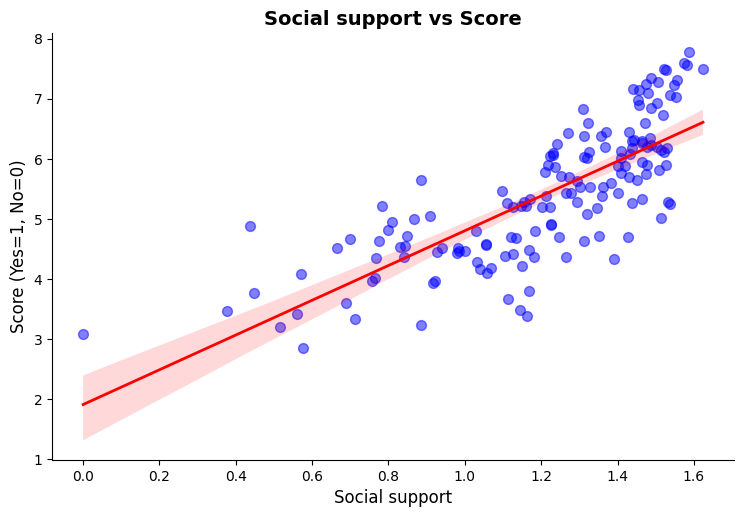

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x='Social support', y='Score', data=df, aspect=1.5, height=5,
                 scatter_kws={'alpha':0.5, 's':50, 'color': 'blue'},
                   line_kws={'color': 'red', 'lw': 2})

#sns.jointplot(x='Age', y='Do you have Panic attack?', data=df1, kind='reg', color='orange')
plt.title('Scatter Plot with Regression Line')
plt.title('Social support vs Score', fontsize=14, fontweight='bold')
plt.xlabel('Social support', fontsize=12)
plt.ylabel('Score (Yes=1, No=0)', fontsize=12)
plt.show()